In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Unemployment, total (% of total labor force) (modeled ILO estimate)
# https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS

In [3]:
# note the first 4 lines of the csv aren't part of the data, so skip them
unemployment_df = pd.read_csv("unemployment_data/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_122378.csv", skiprows=4)

In [4]:
# unemployment_df

In [5]:
# note data only goes from 1991 to 2024. Years 1960 to 1990 are all empty
# just keep Country Name and years 1991 to 2024

In [6]:
years_of_data = list(range(1991, 2025))

# convert the list into strings so I can iterate over column names
years_of_data_str = [str(x) for x in years_of_data]

columns_to_keep = ['Country Name'] + years_of_data_str

# just keep the columns of country name and years
unemployment_df = unemployment_df[columns_to_keep]

In [7]:
# unemployment_df

In [8]:
# sort the rows from highest unemployement to lowest for 2024
unemployment_df_2024_highest_to_lowest = unemployment_df.sort_values(by='2024', ascending=False)
unemployment_df_2024_top_10_highest_unemployment = unemployment_df_2024_highest_to_lowest.iloc[0:10]

In [9]:
unemployment_df_2024_top_10_highest_unemployment

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
224,Eswatini,20.684,21.052,21.750,21.717,21.650,22.074,22.500,23.195,23.837,...,23.285,22.718,24.523,26.369,28.138,32.944,34.153,35.359,35.086,34.400
263,South Africa,23.002,23.262,23.179,22.942,22.647,22.480,22.518,22.673,22.791,...,25.149,26.536,27.035,26.906,28.468,29.217,34.007,33.268,32.098,33.168
56,Djibouti,25.669,25.985,26.728,27.103,27.279,27.153,27.156,27.013,26.740,...,26.070,25.992,26.064,26.184,26.256,27.713,27.668,26.307,26.154,25.875
33,Botswana,13.820,16.326,18.759,21.200,21.394,21.593,21.048,20.860,18.236,...,18.930,19.329,19.664,19.681,20.094,21.017,23.106,23.615,23.381,23.138
80,Gabon,17.282,17.725,17.780,17.794,17.411,17.347,17.197,17.176,17.572,...,19.978,20.134,20.303,20.439,20.358,21.270,21.218,20.399,20.278,20.061
44,"Congo, Rep.",19.917,19.920,19.985,20.232,20.192,20.033,19.886,19.895,20.110,...,19.978,20.223,20.611,20.701,20.392,22.198,21.960,20.108,19.898,19.694
171,Namibia,19.140,18.932,19.104,19.400,21.312,22.835,24.450,23.081,21.669,...,20.808,23.352,21.733,19.877,19.921,21.004,20.922,19.695,19.365,19.148
213,Somalia,19.315,19.536,19.491,19.974,19.747,19.651,19.267,19.169,19.164,...,18.597,18.578,18.523,18.738,18.828,19.413,19.662,19.050,18.941,18.861
132,Libya,18.538,18.796,19.005,19.349,19.443,19.296,19.437,19.282,19.334,...,19.676,19.522,19.020,18.836,19.050,19.613,19.641,19.282,18.753,18.615
253,St. Vincent and the Grenadines,19.770,19.545,19.667,19.967,19.994,20.339,20.116,20.514,20.531,...,19.141,19.028,19.006,18.984,19.235,20.636,20.341,19.417,18.574,18.056


In [10]:
# sort the rows from lowest unemployement to highest for 2024
unemployment_df_2024_lowest_to_highest = unemployment_df.sort_values(by='2024', ascending=True)
unemployment_df_2024_top_10_lowest_unemployment = unemployment_df_2024_lowest_to_highest.iloc[0:10]

In [11]:
unemployment_df_2024_top_10_lowest_unemployment

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
200,Qatar,0.870,0.870,0.870,0.870,0.870,0.870,0.870,0.870,0.870,...,0.170,0.150,0.140,0.110,0.100,0.140,0.140,0.130,0.130,0.126
123,Cambodia,0.781,0.760,0.745,0.995,0.974,0.963,0.638,0.710,0.726,...,0.393,0.716,0.141,0.130,0.119,0.172,0.396,0.231,0.225,0.270
173,Niger,1.583,1.566,1.539,1.502,1.495,1.498,1.502,1.389,1.393,...,0.553,0.548,0.554,0.535,0.531,0.594,0.780,0.418,0.425,0.355
233,Thailand,2.630,1.350,1.490,1.347,1.100,1.071,0.873,3.404,2.968,...,0.597,0.688,0.830,0.765,0.716,1.099,1.215,0.940,0.733,0.693
16,Burundi,3.158,3.133,3.080,3.095,3.077,3.076,3.116,3.159,3.125,...,1.442,1.347,1.247,1.146,1.043,1.030,1.118,0.915,0.921,0.902
229,Chad,0.674,0.664,0.700,0.709,0.749,0.703,0.732,0.727,0.752,...,0.974,1.047,1.116,1.135,1.084,1.707,1.548,1.096,1.074,1.088
22,Bahrain,1.051,0.971,0.884,1.009,1.047,1.182,1.129,1.117,1.115,...,1.160,1.192,1.194,1.200,1.223,1.781,1.541,1.326,1.154,1.102
129,Lao PDR,2.498,2.717,2.739,2.636,2.600,2.449,2.352,2.294,2.154,...,2.494,2.881,3.268,2.900,2.537,2.361,2.066,1.209,1.188,1.218
257,Viet Nam,2.142,2.110,2.038,1.972,1.955,1.930,2.870,2.290,2.330,...,1.848,1.848,1.874,1.161,1.681,2.103,2.385,1.523,1.645,1.431
150,Moldova,1.900,3.700,3.700,5.800,5.300,7.900,7.900,10.000,11.140,...,1.742,1.557,1.586,1.196,1.466,1.186,0.785,0.897,1.555,1.434


In [12]:
# Notes for pd.melt()
# id_vars = 'identifier variables'. These are columns you want to keep as-is (not melt)
## variable column is former column names
## value column is cell values

In [13]:
top_10_lowest_unemployment_countries_melted = pd.melt(unemployment_df_2024_top_10_lowest_unemployment, id_vars='Country Name')

In [14]:
# top_10_lowest_unemployment_countries_melted

In [15]:
# rename columns
top_10_lowest_unemployment_countries_melted = top_10_lowest_unemployment_countries_melted.rename(
    columns = {"variable": "year", 'value': 'unemployment_rate'}
)

In [16]:
top_10_lowest_unemployment_countries_melted

,Country Name,year,unemployment_rate
0,Qatar,1991,0.870
1,Cambodia,1991,0.781
2,Niger,1991,1.583
3,Thailand,1991,2.630
4,Burundi,1991,3.158
...,...,...,...
335,Chad,2024,1.088
336,Bahrain,2024,1.102
337,Lao PDR,2024,1.218
338,Viet Nam,2024,1.431


In [17]:
top_10_highest_unemployment_countries_melted = pd.melt(unemployment_df_2024_top_10_highest_unemployment, id_vars='Country Name')

In [18]:
# top_10_highest_unemployment_countries_melted

In [19]:
# rename columns
top_10_highest_unemployment_countries_melted = top_10_highest_unemployment_countries_melted.rename(
    columns = {"variable": "year", 'value': 'unemployment_rate'}
)

In [35]:
top_10_lowest_unemployment_countries_melted

,Country Name,year,unemployment_rate
0,Qatar,1991,0.870
1,Cambodia,1991,0.781
2,Niger,1991,1.583
3,Thailand,1991,2.630
4,Burundi,1991,3.158
...,...,...,...
335,Chad,2024,1.088
336,Bahrain,2024,1.102
337,Lao PDR,2024,1.218
338,Viet Nam,2024,1.431


In [36]:
np.min(top_10_lowest_unemployment_countries_melted['unemployment_rate'])

np.float64(0.1)

In [44]:
np.max(top_10_lowest_unemployment_countries_melted['unemployment_rate'])

np.float64(11.14)

In [21]:
# sns.lineplot(data=data, x="timepoint", y="signal", hue="region")

In [22]:
# x needs to point to the column name of the datafram to use for x
# y needs to point to the column name of the datafram to use for y

In [38]:
top_10_lowest_unemployment_countries_melted

,Country Name,year,unemployment_rate
0,Qatar,1991,0.870
1,Cambodia,1991,0.781
2,Niger,1991,1.583
3,Thailand,1991,2.630
4,Burundi,1991,3.158
...,...,...,...
335,Chad,2024,1.088
336,Bahrain,2024,1.102
337,Lao PDR,2024,1.218
338,Viet Nam,2024,1.431


In [ ]:
# Top 10 lowest unemployment countries plot using seaborn and matplotlib

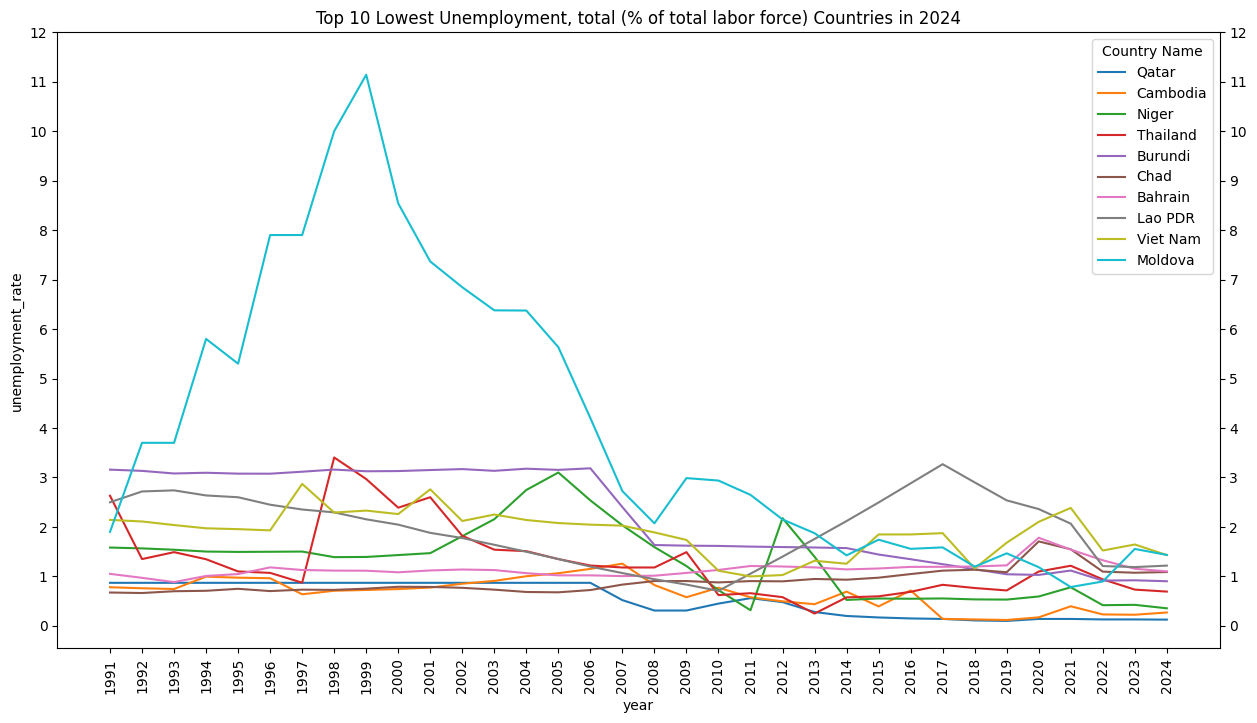

In [50]:
# set the size of the plot manually
plt.figure(figsize=(15,8))

# make a line chart with x using 'year' column, y using 'unemployment_rate' column, and color using "Country Name" column
ax = sns.lineplot(data=top_10_lowest_unemployment_countries_melted, x="year", y="unemployment_rate", hue="Country Name")

# set the text for x ticks to be vertical. Otherwise they will be written left to write on the bottom and they will overlap
ax.tick_params(axis='x', labelrotation=90)

# Set custom y-axis tick locations and labels
# ax.set_yticks(range(len(data.index)))
# ax.set_yticklabels(data.index, rotation=0)

# Move y-axis ticks to the right (Note I don't need this because I later set ax.tick_params(axis='y', which='both', ...
# ax.yaxis.tick_right()

# set the title of whole chart
ax.set_title("Top 10 Lowest Unemployment, total (% of total labor force) Countries in 2024")

# set the y axis ticks to go from 0 to the max and go by 0.5
# plt.yticks( np.arange(0, 12.5, step=0.5) )
# I need to pass in an array or list from the first to last element
plt.yticks( np.arange(0, 13, step=1) )

# SPECIAL CASE: I want to put y axis ticks on left and right sides
ax.tick_params(axis='y', which='both', labelleft=True, labelright=True, left=True, right=True)

# plt.show()

# Visualizations of top 10 highest employment countries in 2024 and top 10 lowest unemployment countries in 2024 with Altair

In [25]:
top_10_lowest_unemployment_countries_chart = alt.Chart(top_10_lowest_unemployment_countries_melted).mark_line().encode(
  x=alt.X('year'),
  y=alt.Y('unemployment_rate'),
  color = alt.Color('Country Name')
).properties(
    width=900,
    height=500,
    #title = 'Top 10 Lowest Unemployment, total (% of total labor force) Countries in 2024 (1991 to 2024)'
     title=alt.TitleParams(
        text='Top 10 Lowest Unemployment, total (% of total labor force) Countries in 2024',
        subtitle=['Years 1991 to 2024'],
        # font size of overall title
        fontSize = 20,
        # font size of subtitle
         subtitleFontSize = 16
    )
# increase font size of text for legent
).configure_legend(
    titleFontSize=18,
    labelFontSize=15

# increase font size of title text and text on x axis and y axis
).configure_axis(
    # labelFontSize is the size of the ticks
    labelFontSize=13,
    # titleFontSize is size of the text on x or y axis
    titleFontSize=13
)

In [26]:
top_10_lowest_unemployment_countries_chart

alt.Chart(...)

In [27]:
# top_10_highest_unemployment_countries_melted

In [28]:
# top_10_highest_unemployment_countries_chart = alt.Chart(top_10_highest_unemployment_countries_melted).mark_line().encode(
#   x=alt.X('year'),
#   y=alt.Y('unemployment_rate'),
#   color = alt.Color('Country Name')
# ).properties(
#     width=900,
#     height=500,
#     # title = 'Top 10 Highest Unemployment, total (% of total labor force) Countries in 2024 (1991 to 2024)'
#     title=alt.TitleParams(
#         text='Top 10 Highest Unemployment, total (% of total labor force) Countries in 2024',
#         subtitle=['Years 1991 to 2024']
#     )
# )

In [29]:
top_10_highest_unemployment_countries_chart = alt.Chart(top_10_highest_unemployment_countries_melted).mark_line().encode(
  x=alt.X('year'),
  y=alt.Y('unemployment_rate'),
  color = alt.Color('Country Name')
).properties(
    width=900,
    height=500,
    #title = 'Top 10 Lowest Unemployment, total (% of total labor force) Countries in 2024 (1991 to 2024)'
     title=alt.TitleParams(
        text='Top 10 Highest Unemployment, total (% of total labor force) Countries in 2024',
        subtitle=['Years 1991 to 2024'],
        # font size of overall title
        fontSize = 20,
        # font size of subtitle
         subtitleFontSize = 16
    )
# increase font size of text for legent
).configure_legend(
    titleFontSize=18,
    labelFontSize=15

# increase font size of title text and text on x axis and y axis
).configure_axis(
    # labelFontSize is the size of the ticks
    labelFontSize=13,
    # titleFontSize is size of the text on x or y axis
    titleFontSize=13
)

In [30]:
top_10_highest_unemployment_countries_chart

alt.Chart(...)